## Importations

In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import sys
sys.path.append('../')

## ML
from scripts.machine_learning_utils import *

## data
import seaborn as sns
import pandas as pd

from scipy.stats import linregress

#

rc('font', family='sans-serif', size = 7)
rc('figure', dpi= 700)
rc(('xtick', 'ytick'), labelsize = 7)
rc('legend', fontsize=5)
rc('lines', linewidth = 1)
rc('axes', linewidth = 0.5, labelsize =8)
rc('legend', handlelength = 2)



Skipped loading some PyTorch models, missing a dependency. No module named 'torch'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. No module named 'torch'
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'torch'
Skipped loading some Jax models, missing a dependency. No module named 'jax'


## Get data

In [2]:
## pour les descirpteurs quantiques 
df_atom1 = pd.read_csv('csv/df_atom1_ext.csv').set_index("can")
df_global = pd.read_csv('csv/df_global_ext.csv').set_index("can")
print('should be 19 :', df_atom1.shape[1])
print('should be 24 :', df_global.shape[1])

data_Q_tot = {}

data_Q_tot['global']=df_global

data_Q_tot['atom1']=df_atom1

should be 19 : 19
should be 24 : 24


### Récuperer les data de FIA, HIA, reorg_nrj et GB Ddelta

In [3]:
df_small_LA = pd.read_csv('csv/nrj_data/df_small_LA.csv')
 
df_total = pd.read_csv('csv/nrj_data/df_total.csv').set_index('SMILES')
#df_total = df_total.drop('Cc1c([N+](=O)[O-])cc2c(c1[N+](=O)[O-])OB1Oc3c(cc([N+](=O)[O-])c(C)c3[N+](=O)[O-])N12')
#df_total = df_total.drop('N#Cc1c2c(cc(C(F)(F)F)c1C(F)(F)F)N1B(O2)Oc2c1cc(C(F)(F)F)c(C(F)(F)F)c2C#N')

In [4]:
df_small_LA = pd.read_csv('csv/nrj_data/df_small_LA.csv')

In [5]:
df_small_LA.names

0                $BH_3$
1               $BBr_3$
2         B(triptycene)
3             $B(Me)_3$
4               $BCl_3$
5                $BF_3$
6         $B(C_2F_5)_3$
7     $B(OC(CF_3)_3)_3$
8        $B(OC_6F_5)_3$
9                $BI_3$
10          $B(NH_2)_3$
11           $B(OTf)_3$
12            $B(OH)_3$
13            $B(SH)_3$
14            $B(Ph)_3$
Name: names, dtype: object

In [4]:
df_all_data = pd.read_excel('csv/NMR_smiles_data_sources_nrjs.xlsx')

In [12]:
list(df_all_data[df_all_data["FIA"].isnull()].SMILES)

['FC(F)(F)c1cc(B(c2cc(C(F)(F)F)cc(C(F)(F)F)c2)c2cc(C(F)(F)F)cc(C(F)(F)F)c2)cc(C(F)(F)F)c1']

In [5]:
df_all_data = df_all_data.dropna(subset = 'FIA') # on a une molécule (l'adduit fluoré) pour laquelle on a pas su calculer la FIA donc on l'enlève tant pis...

## Plots

### Database "df_total" (ONO, NNN, Ohmiya)

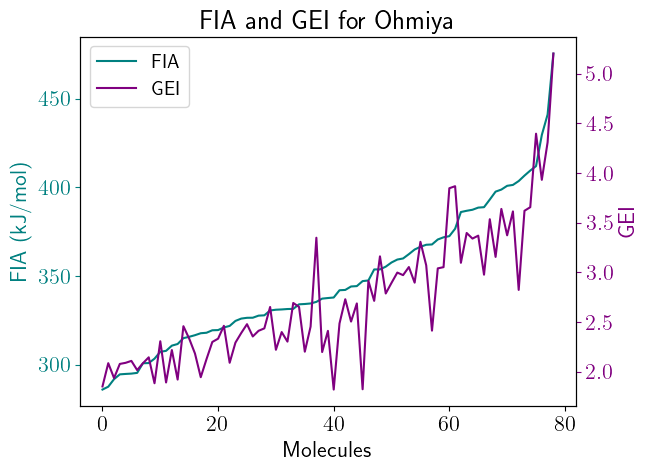

In [53]:
# Données pour la première série
df = df_total[df_total.group == 'Ohmiya'].sort_values("FIA")
x = range(len(df))

y1 = df['FIA']

# Données pour la deuxième série
y2 = df['GEI']

# Création de la figure et des axes
fig, ax1 = plt.subplots()

# Tracé de la première série de données
ax1.plot(x, y1, '-', color='teal', label='FIA')
ax1.set_xlabel('Molecules')
ax1.set_ylabel('FIA (kJ/mol)', color='teal')
ax1.tick_params('y', colors='teal')
#ax1.set_ylim(bottom=y1[0])

# Création d'un deuxième axe partageant le même abscisse
ax2 = ax1.twinx()

# Tracé de la deuxième série de données
ax2.plot(x, y2, '-', color = 'purple', label='GEI')
ax2.set_ylabel('GEI (eV)', color='purple')
ax2.tick_params('y', colors='purple')
#ax2.set_ylim(bottom=y2[0])


# Superposition des deux premiers points sur le graphe
#ax1.plot(x[0], y1[0], 'bo', label = "superposition")
#ax2.plot(x[0], y2[0], 'ro')


# Affichage de la légende
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

# Affichage du graphe
plt.title('FIA and GEI for Ohmiya')
plt.show()

fig.savefig(f'figures/LA_description/FIA_GEI_Ohmiya.png', facecolor = 'white', 
            format = 'png', transparent = False, bbox_inches='tight', dpi = 400)

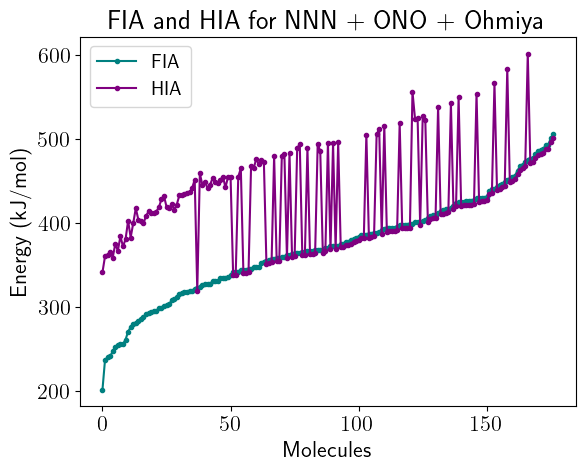

In [9]:
# Données pour la première série
df = df_total.dropna(subset='HIA').sort_values("FIA")
x = range(len(df))

y1 = df['FIA']

# Données pour la deuxième série
y2 = df['HIA']

# Création de la figure et des axes
fig, ax1 = plt.subplots()

# Tracé de la première série de données
ax1.plot(x, y1, '.-', color='teal', label='FIA')

ax1.plot(x, y2, '.-', color = 'purple', label='HIA')

ax1.set_xlabel('Molecules')
ax1.set_ylabel('Energy (kJ/mol)', color='black')
ax1.tick_params('y', colors='black')

ax1.legend()



# Affichage du graphe
plt.title('FIA and HIA for NNN + ONO + Ohmiya')
plt.show()

fig.savefig(f'figures/LA_description/FIA_HIA_NNN_ONO_Ohmiya.png', facecolor = 'white', 
            format = 'png', transparent = False, bbox_inches='tight', dpi = 400)

/tmp/ipykernel_9650/1222762669.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df_total.dropna(subset='HIA')[df_total.group == 'ONO'].sort_values("FIA")


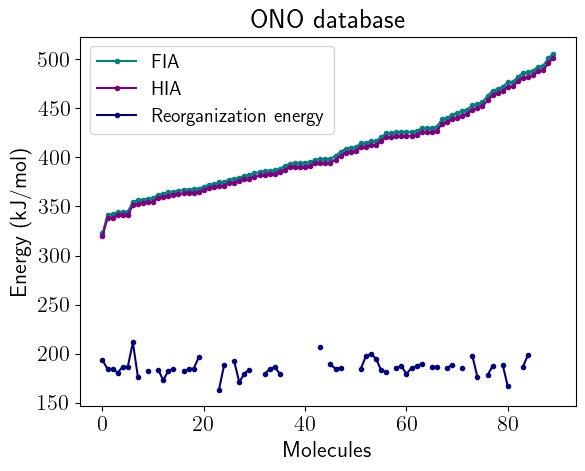

In [10]:
# Données pour la première série
df = df_total.dropna(subset='HIA')[df_total.group == 'ONO'].sort_values("FIA")
x = range(len(df))

y1 = df['FIA']
y2 = df['HIA']
y3 = df['reorg_nrj']

# Création de la figure et des axes
fig, ax1 = plt.subplots()

# Tracé de la première série de données
ax1.plot(x, y1, '.-', color='teal', label='FIA')

ax1.plot(x, y2, '.-', color = 'purple', label='HIA')

ax1.plot(x, y3, '.-', color = 'navy', label='Reorganization energy')

ax1.set_xlabel('Molecules')
ax1.set_ylabel('Energy (kJ/mol)', color='black')
ax1.tick_params('y', colors='black')

ax1.legend()



# Affichage du graphe
plt.title('ONO database')
plt.show()

fig.savefig(f'figures/LA_description/FIA_HIA_reorg_nrj_ONO.png', facecolor = 'white', 
            format = 'png', transparent = False, bbox_inches='tight', dpi = 400)

In [37]:
df_total.dropna(subset='HIA')[df_total.group == 'ONO'].sort_values("FIA")

/tmp/ipykernel_33420/1928840083.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_total.dropna(subset='HIA')[df_total.group == 'ONO'].sort_values("FIA")


FIA group  \
SMILES                                                                 
CN(C)c1cc(O)c2c(c1)N1B(O2)Oc2c(O)cc(N(C)C)cc21      322.585673   ONO   
CN(C)c1c(O)ccc2c1OB1Oc3c(ccc(O)c3N(C)C)N12          341.499593   ONO   
Cc1c2c(cc(N)c1C(C)(C)C)N1B(O2)Oc2c1cc(N)c(C(C)(...  341.994762   ONO   
c1(OB2N3c4ccccc4O2)c3cccc1                          344.386971   ONO   
COc1cc2c(c(N)c1C)OB1Oc3c(cc(OC)c(C)c3N)N12          344.417259   ONO   
...                                                        ...   ...   
O=[N+]([O-])c1cc2c(c(F)c1Br)OB1Oc3c(cc([N+](=O)...  488.298687   ONO   
O=[N+]([O-])c1cc(C(F)(F)F)cc2c1OB1Oc3c(cc(C(F)(...  492.601829   ONO   
O=[N+]([O-])c1cc2c(c(C(F)(F)F)c1)OB1Oc3c(cc([N+...  493.412925   ONO   
N#Cc1cc2c(c(F)c1C(F)(F)F)OB1Oc3c(cc(C#N)c(C(F)(...  501.127616   ONO   
O=[N+]([O-])c1c2c(cc(Cl)c1C(F)(F)F)N1B(O2)Oc2c1...  505.823927   ONO   

                                                           HIA   reorg_nrj  \
SMILES                                                                       
CN(C)c1cc(O)c2c(c1)N1B(O2)Oc2c(O)cc(N(C)C)cc21      319.452556  193.292606   
CN(C)c1c(O)ccc2c1OB1Oc3c(ccc(O)c3N(C)C)N12          338.182774   184.27058   
Cc1c2c(cc(N)c1C(C)(C)C)N1B(O2)Oc2c1cc(N)c(C(C)(...  338.673134  184.425254   
c1(OB2N3c4ccccc4O2)c3cccc1                          341.042109  180.683742   
COc1cc2c(c(N)c1C)OB1Oc3c(cc(OC)c(C)c3N)N12          341.072102  186.598308   
...                                                        ...         ...   
O=[N+]([O-])c1cc2c(c(F)c1Br)OB1Oc3c(cc([N+](=O)...   483.55608        None   
O=[N+]([O-])c1cc(C(F)(F)F)cc2c1OB1Oc3c(cc(C(F)(...  487.817428        None   
O=[N+]([O-])c1cc2c(c(C(F)(F)F)c1)OB1Oc3c(cc([N+...  488.620646        None   
N#Cc1cc2c(c(F)c1C(F)(F)F)OB1Oc3c(cc(C#N)c(C(F)(...  496.260408        None   
O=[N+]([O-])c1c2c(cc(Cl)c1C(F)(F)F)N1B(O2)Oc2c1...  500.911106        None   

                                                         GEI  
SMILES                                                        
CN(C)c1cc(O)c2c(c1)N1B(O2)Oc2c(O)cc(N(C)C)cc21      1.152520  
CN(C)c1c(O)ccc2c1OB1Oc3c(ccc(O)c3N(C)C)N12          1.030130  
Cc1c2c(cc(N)c1C(C)(C)C)N1B(O2)Oc2c1cc(N)c(C(C)(...  1.175237  
c1(OB2N3c4ccccc4O2)c3cccc1                          1.420107  
COc1cc2c(c(N)c1C)OB1Oc3c(cc(OC)c(C)c3N)N12          1.087237  
...                                                      ...  
O=[N+]([O-])c1cc2c(c(F)c1Br)OB1Oc3c(cc([N+](=O)...  3.791661  
O=[N+]([O-])c1cc(C(F)(F)F)cc2c1OB1Oc3c(cc(C(F)(...  4.203466  
O=[N+]([O-])c1cc2c(c(C(F)(F)F)c1)OB1Oc3c(cc([N+...  4.159460  
N#Cc1cc2c(c(F)c1C(F)(F)F)OB1Oc3c(cc(C#N)c(C(F)(...  3.785639  
O=[N+]([O-])c1c2c(cc(Cl)c1C(F)(F)F)N1B(O2)Oc2c1...  3.952118  

[90 rows x 5 columns]

### Database NMR

In [ ]:
df_NMR_LA = pd.read_csv('csv/df_NMR_LA.csv')

In [ ]:
df_data_NMR = pd.read_excel('csv/table_smiles_NMR.xlsx')

In [4]:
df_data_NMR = df_data_NMR.dropna(axis = 0, subset = ["SMILES"])

In [14]:
df_all_data.columns

Index(['SMILES', 'delta (neat)', 'Ddelta (neat)', 'delta (CD2Cl2)',
       'Ddelta (CD2Cl2)', 'source', 'delta (C6D6)', 'Ddelta(C6D6)', 'source.1',
       'average Ddelta', 'name', 'FIA', 'HIA', 'reorg_nrj', 'GEI'],
      dtype='object')

In [38]:
df_pairplot = df_all_data[['average Ddelta',  'FIA',
       'reorg_nrj', 'GEI']].rename(columns={'average Ddelta':'GB $\Delta\delta$ (ppm)', 'FIA' : 'FIA (kJ/mol)', 'reorg_nrj' : 'Reorg. energy (kJ/mol)', 'GEI' : 'GEI (eV)'})

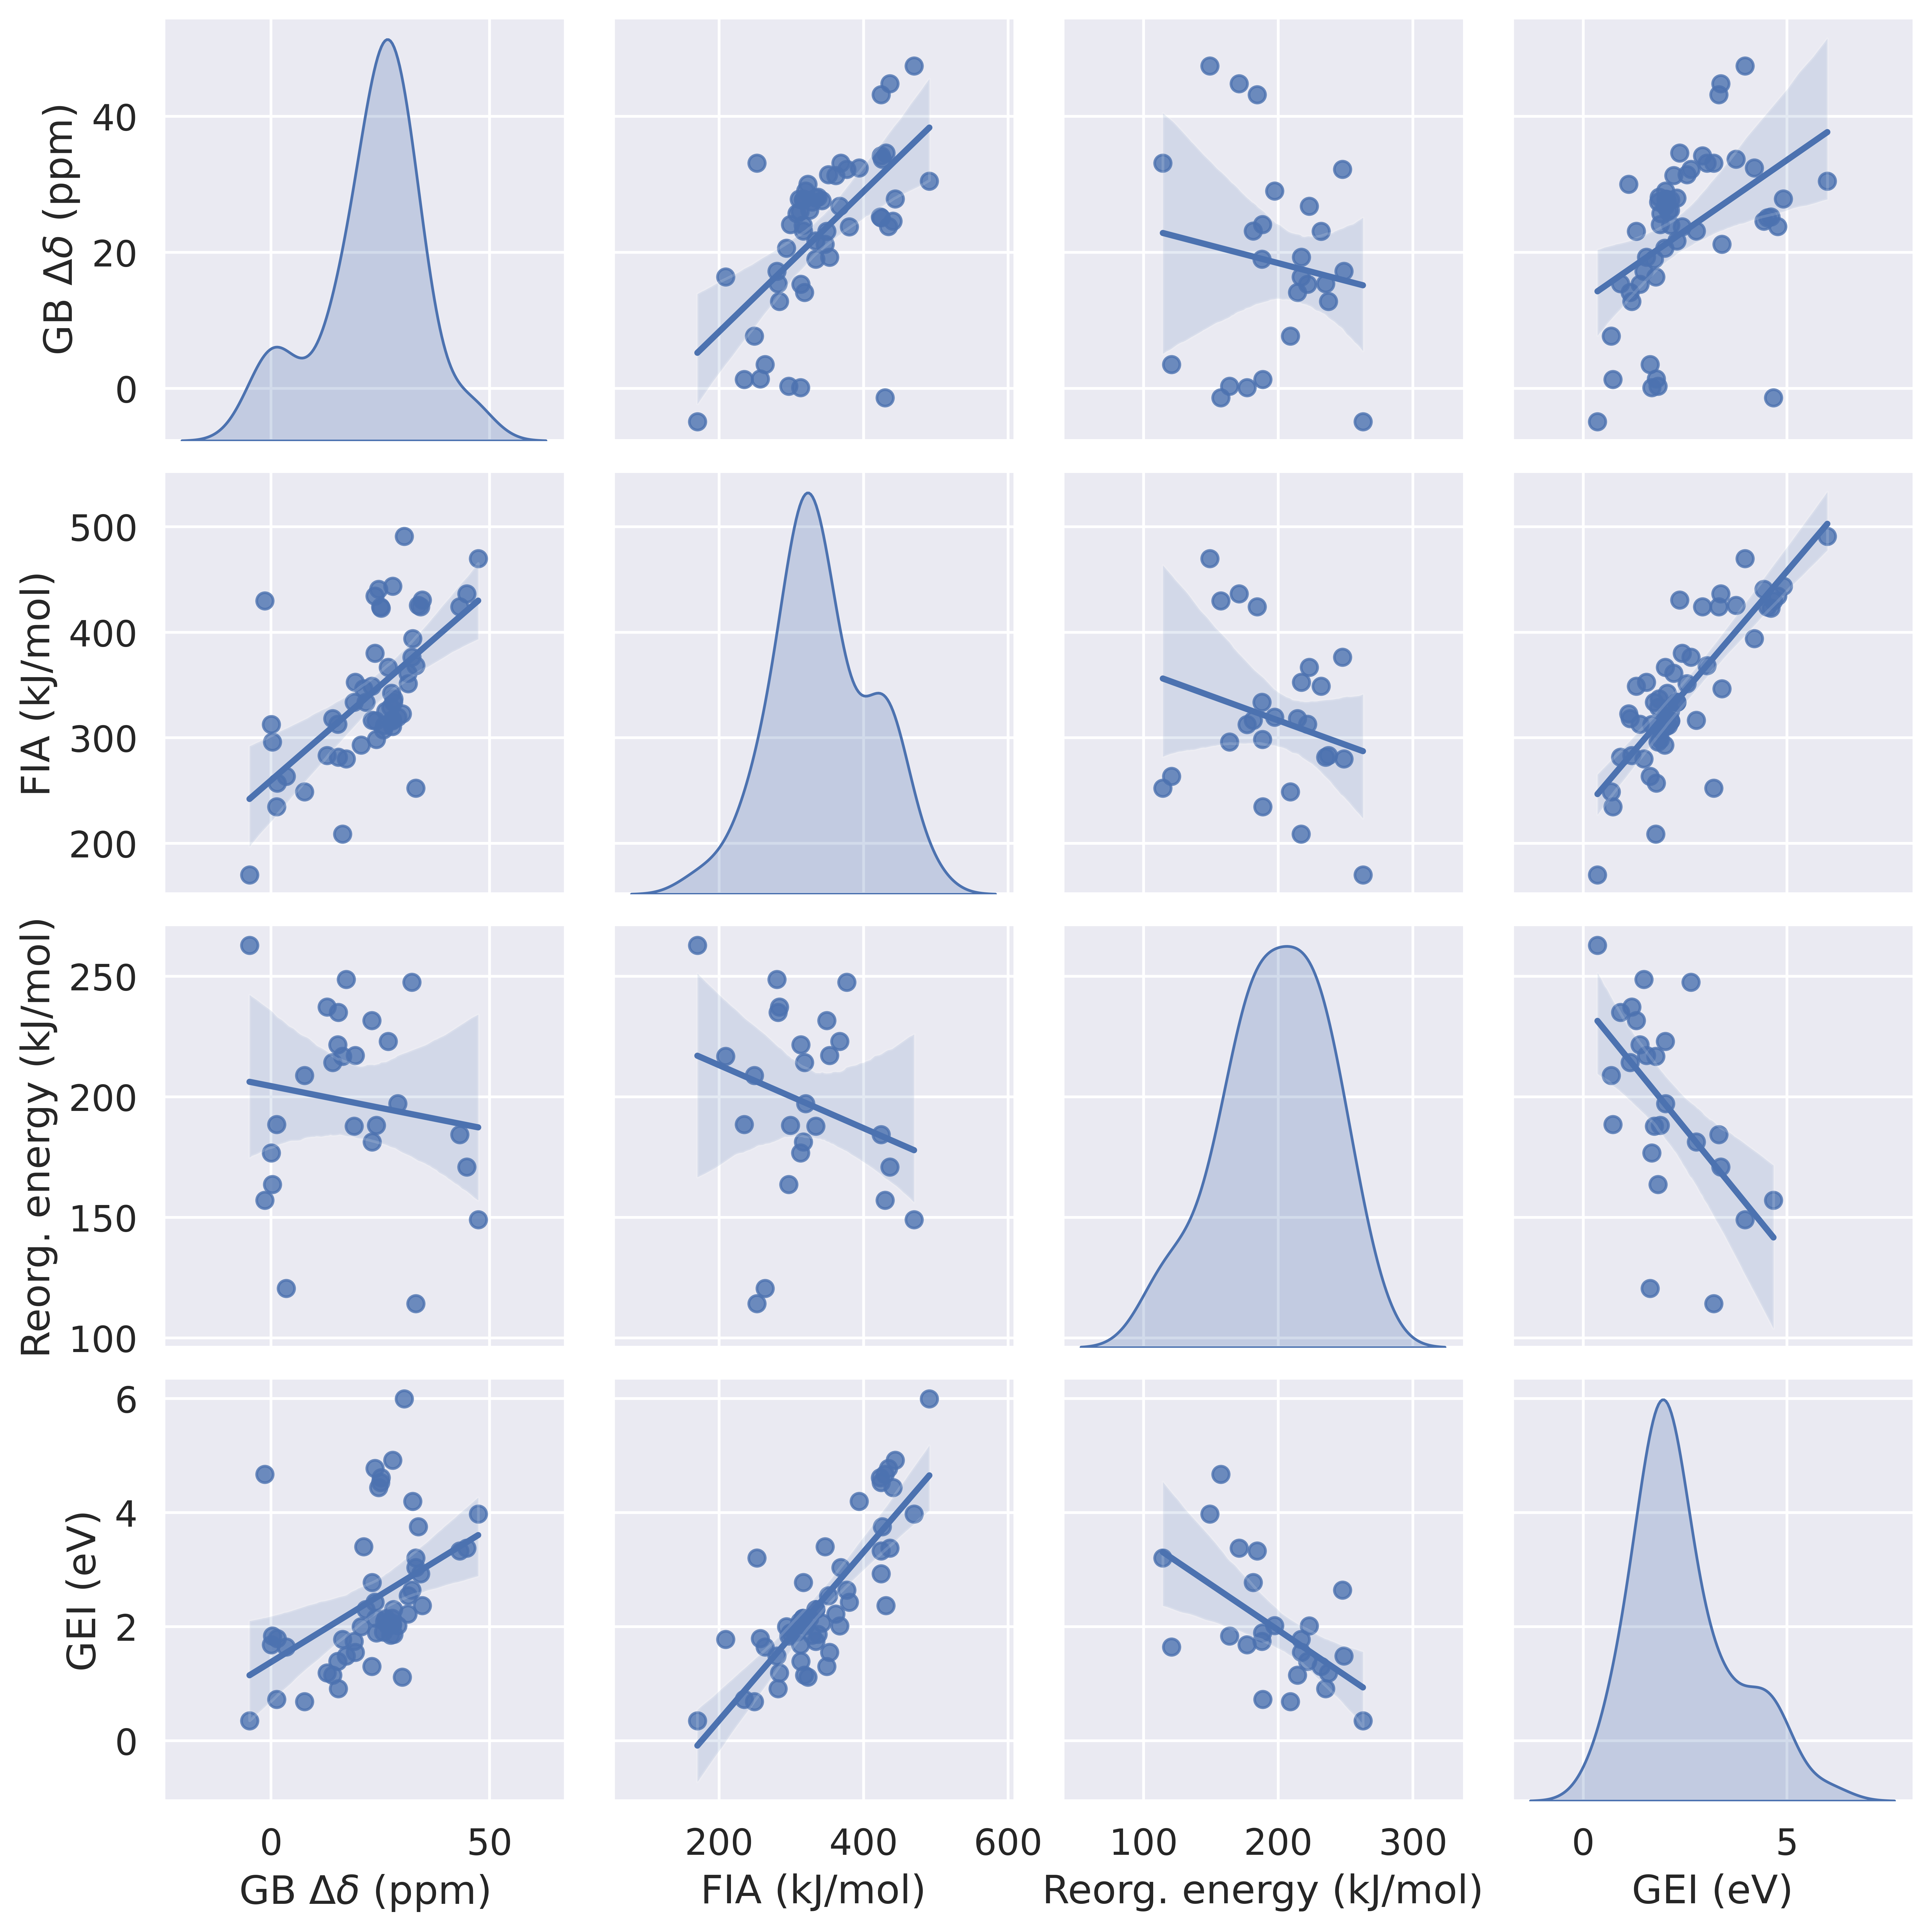

In [45]:

sns.set(rc={'figure.figsize':(7,7)}, font_scale = 1.2)
pairplot = sns.pairplot(df_pairplot , kind="reg", diag_kind="kde")

pairplot.savefig('article/figures/pairplot_LA.png', transparent= False, bbox_inches='tight')


In [51]:
df_all_data[['average Ddelta', 'FIA', 'HIA', "reorg_nrj", 'GEI']].corr().to_csv('article/tables/correlation_matrix_lexis_acidity.csv')

In [46]:
df_all_data

SMILES  delta (neat)  \
0                                        CCOB(OCC)OCC          48.7   
1                                           COB(OC)OC           NaN   
2                                  ClCCOB(OCCCl)OCCCl          55.1   
3                               ClCCCOB(OCCCCl)OCCCCl          56.3   
4                            ClCCCCOB(OCCCCCl)OCCCCCl          53.8   
5                      ClC(Cl)COB(OCC(Cl)Cl)OCC(Cl)Cl          67.8   
6          ClC(Cl)(Cl)COB(OCC(Cl)(Cl)Cl)OCC(Cl)(Cl)Cl          73.2   
7                   ClCC(CCl)OB(OC(CCl)CCl)OC(CCl)CCl          60.3   
8                                  BrCCOB(OCCBr)OCCBr          58.2   
9                                     ICCOB(OCCI)OCCI          61.6   
10                  FC(F)(F)COB(OCC(F)(F)F)OCC(F)(F)F          71.0   
11   CC[Si](CC)(CC)OB(O[Si](CC)(CC)CC)O[Si](CC)(CC)CC          56.4   
12  Fc1c(F)c(F)c(B(c2c(F)c(F)c(F)c(F)c2F)c2c(F)c(F...           NaN   
13                      c1ccc(B(c2ccccc2)c2ccccc2)cc1           NaN   
14  Fc1cc(F)c(F)c(B(c2c(F)c(F)cc(F)c2F)c2c(F)c(F)c...           NaN   
15  Fc1cc(B(c2cc(F)c(F)c(F)c2F)c2cc(F)c(F)c(F)c2F)...           NaN   
16            Fc1cccc(F)c1B(c1c(F)cccc1F)c1c(F)cccc1F           NaN   
18  Fc1c(F)c(F)c(B(c2c(F)c(F)c(F)c(F)c2F)c2c(Cl)c(...           NaN   
19  Fc1c(F)c(F)c(B(c2c(Cl)c(Cl)c(Cl)c(Cl)c2Cl)c2c(...           NaN   
20  FC(F)(F)c1cc(C(F)(F)F)c(Bc2c(C(F)(F)F)cc(C(F)(...           NaN   
21                   c1ccc(OB(Oc2ccccc2)Oc2ccccc2)cc1           NaN   
22  Fc1c(F)c(F)c(OB(c2c(F)c(F)c(F)c(F)c2F)c2c(F)c(...           NaN   
23  Fc1c(F)c(F)c(OB(Oc2c(F)c(F)c(F)c(F)c2F)c2c(F)c...           NaN   
24  Fc1c(F)c(F)c(OB(Oc2c(F)c(F)c(F)c(F)c2F)Oc2c(F)...           NaN   
25                                             FB(F)F          80.9   
26                                  FB(F)OOOSC(F)(F)F          84.6   
27                                                  B           NaN   
28                                          CCB(CC)CC           NaN   
29                                          ClB(Cl)Cl          88.7   
30                                          BrB(Br)Br          90.3   
31                                             IB(I)I          92.9   
32                                      OB(O)c1ccccc1           NaN   
33                            c1ccc(B2Oc3ccccc3O2)cc1           NaN   
34                             Fc1ccccc1B1Oc2ccccc2O1           NaN   
35                           Fc1cccc(B2Oc3ccccc3O2)c1           NaN   
36                           Fc1ccc(B2Oc3ccccc3O2)cc1           NaN   
37                        Fc1ccc(B2Oc3ccccc3O2)c(F)c1           NaN   
38                          Fc1cccc(F)c1B1Oc2ccccc2O1           NaN   
39                       Fc1cc(B2Oc3ccccc3O2)cc(F)c1F           NaN   
40                     Fc1cc(F)c(B2Oc3ccccc3O2)c(F)c1           NaN   
41                 Fc1c(F)c(F)c(B2Oc3ccccc3O2)c(F)c1F           NaN   
42  Fc1c(F)c(F)c(B2Cc3ccc4ccccc4c3-c3c(ccc4ccccc34...           NaN   
43                         CC1(C)OB(c2ccccc2F)OC1(C)C           NaN   
44  Fc1c(F)c(C(F)(F)F)c(F)c(F)c1B(c1c(F)c(F)c(C(F)...           NaN   
45  Clc1c(Cl)c(Cl)c(B(c2c(Cl)c(Cl)c(Cl)c(Cl)c2Cl)c...           NaN   
46                                 CN(C)B(N(C)C)N(C)C           NaN   
47                       Fc1cc(B2Oc3ccccc3O2)cc(F)c1F           NaN   
48         Fc1c(F)c(F)c(B2Oc3cccc4cccc(c34)O2)c(F)c1F           NaN   
49               Fc1cc(B2Oc3cccc4cccc(c34)O2)cc(F)c1F           NaN   
50             Fc1cc(F)c(B2Oc3cccc4cccc(c34)O2)c(F)c1           NaN   
51                  Fc1cccc(F)c1B1Oc2cccc3cccc(c23)O1           NaN   
52                Clc1cccc(Cl)c1B1Oc2cccc3cccc(c23)O1           NaN   
53             Cc1cc(C)c(B2Oc3cccc4cccc(c34)O2)c(C)c1           NaN   
54                          Fc1cccc(F)c1B1Oc2ccccc2O1           NaN   
55                     Cc1cc(C)c(B2Oc3ccccc3O2)c(C)c1           NaN   

    Ddelta (neat)  delta (CD2Cl2)  Ddelta (CD2Cl2)  \
0             7.

In [ ]:
mols = [Chem.MolFromSmiles(smi) for smi in df_data_NMR.SMILES]

legends = [str(i) for i in df_data_NMR.index]

Chem.Draw.MolsToGridImage(mols, legends = legends)

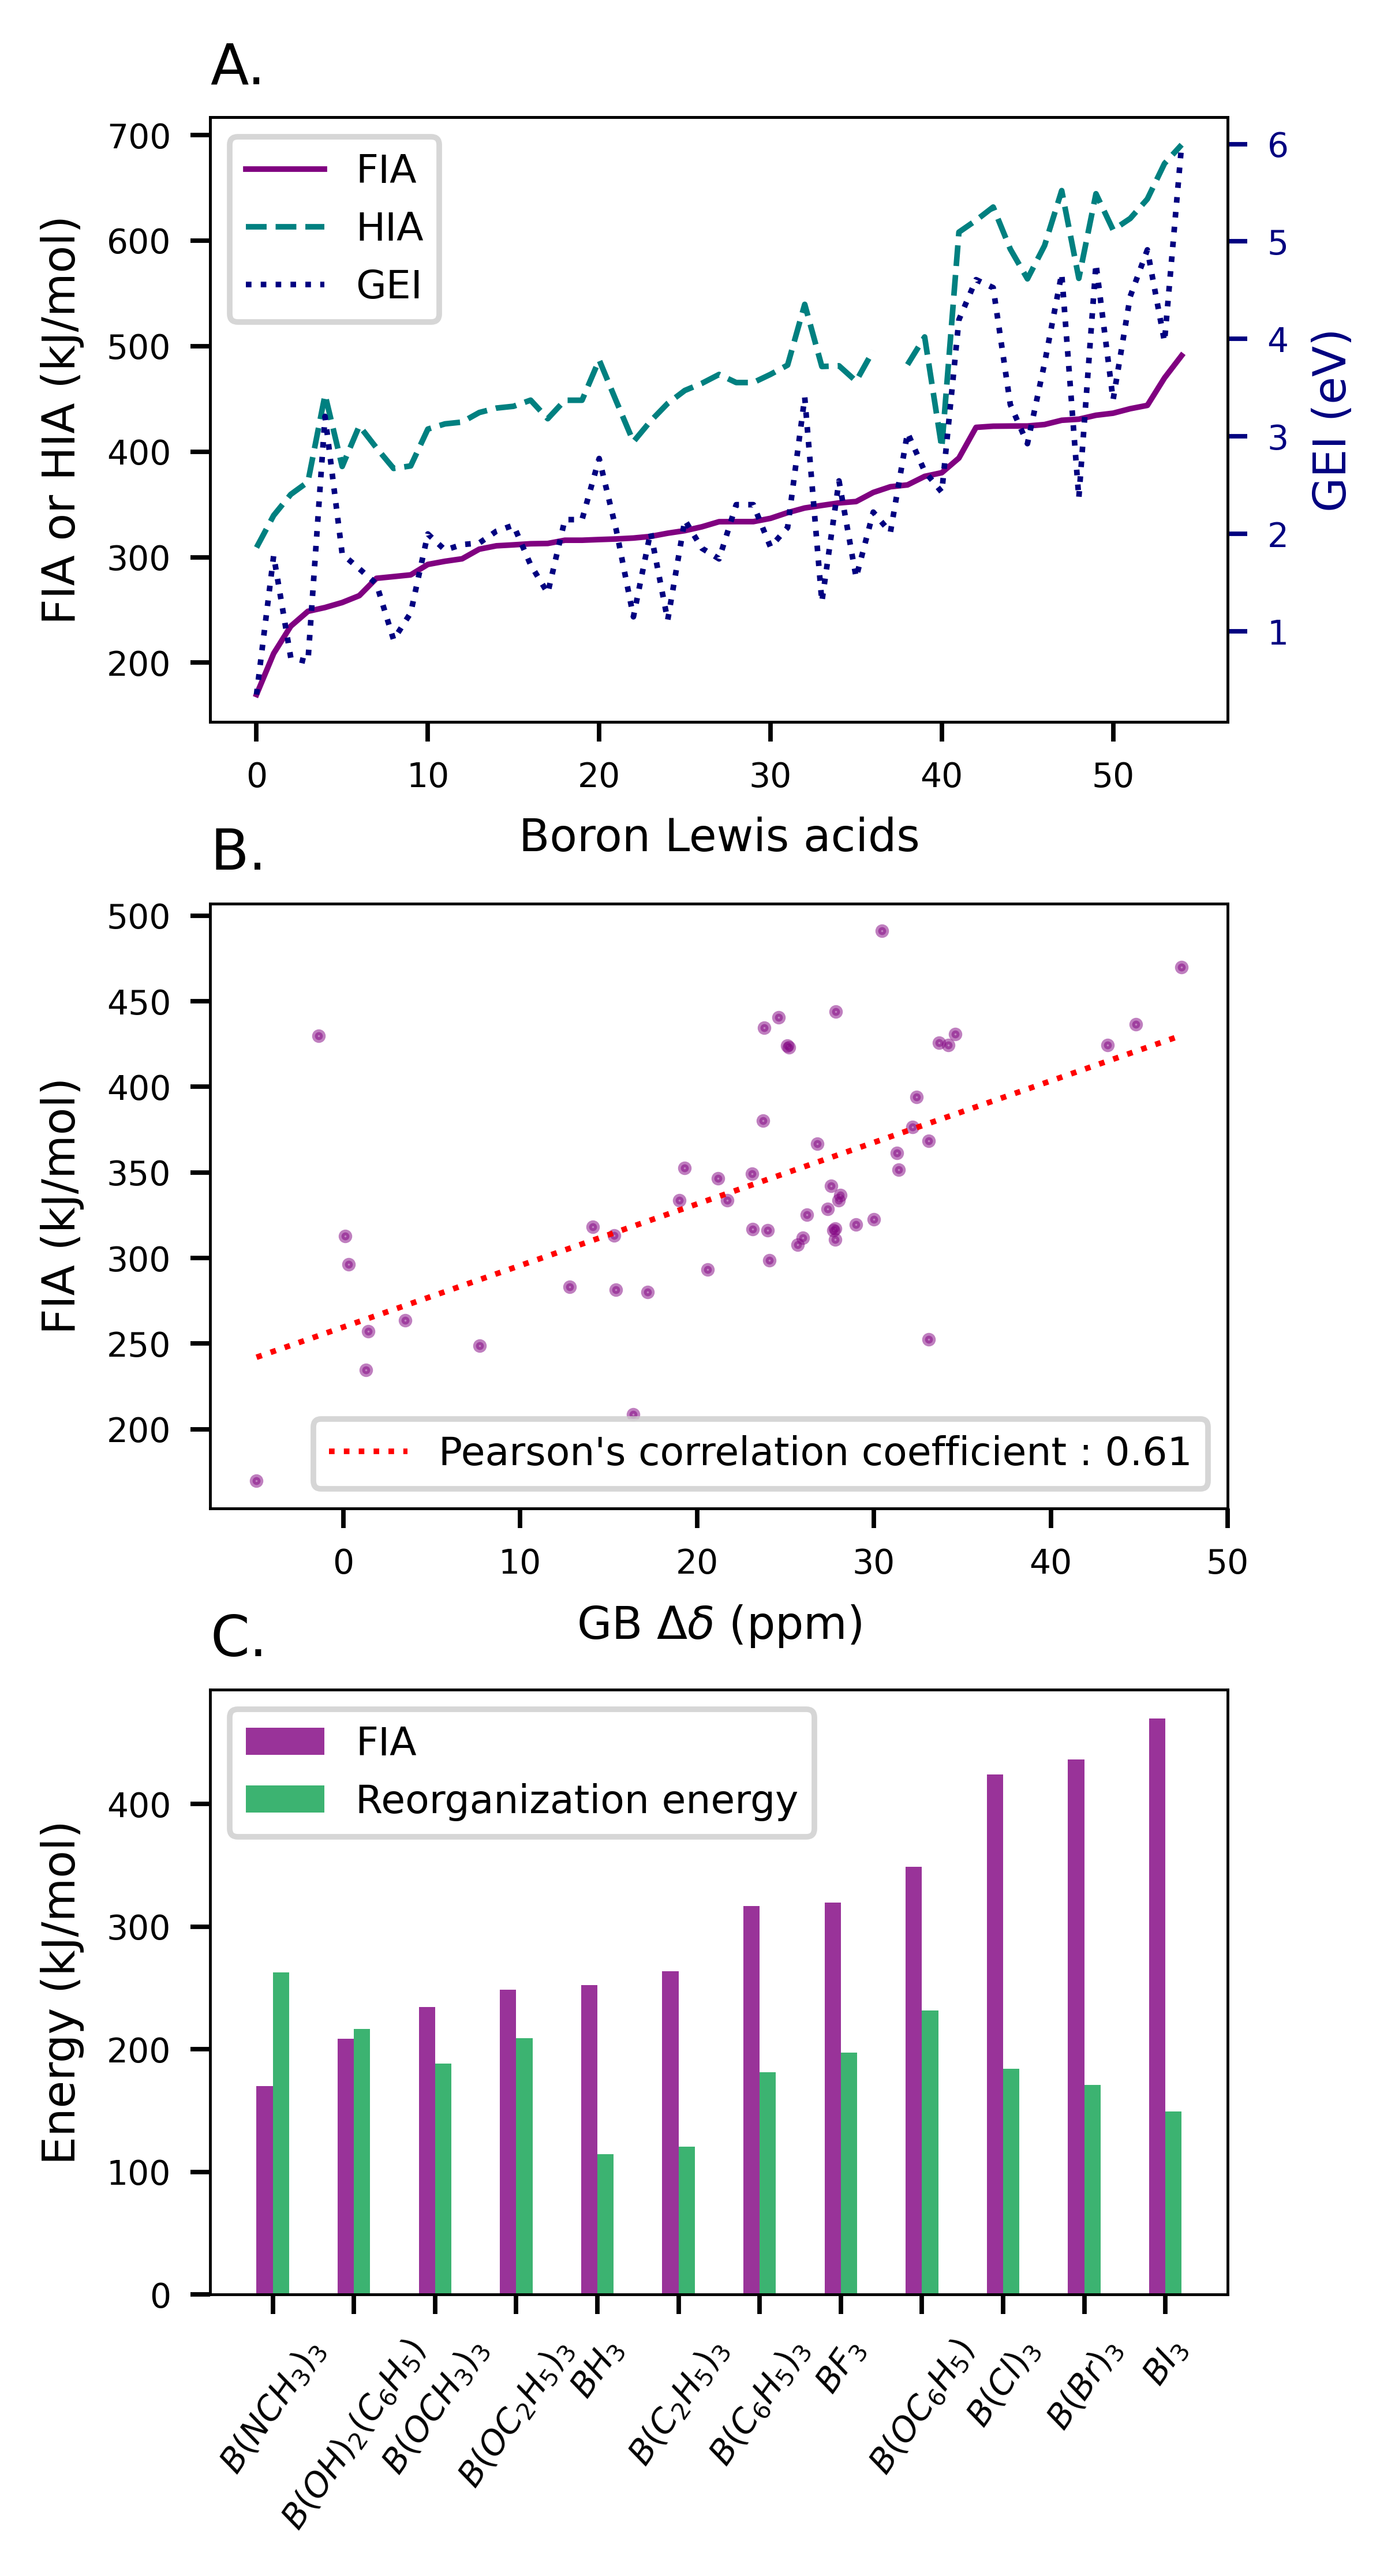

In [6]:
# Création de la figure et de la grille
fig = plt.figure(figsize=(3.25, 7))
gs = fig.add_gridspec(3, 1)

## 1er sous-graphique ##
 
df = df_all_data.sort_values("FIA")
ax1 = fig.add_subplot(gs[0])

x = range(len(df))

# Tracé des séries de données FIA et HIA sur le même axe
ax1.plot(x, df['FIA'], 'purple', linestyle = 'solid', label='FIA')
ax1.plot(x, df['HIA'], "teal", linestyle = 'dashed' , label='HIA')

ax1.set_xlabel('Boron Lewis acids')
ax1.set_ylabel('FIA or HIA (kJ/mol)', color='black')
ax1.tick_params('y', colors='black')

# Tracé de la série GEI sur un axe distinct
ax1_3 = ax1.twinx()

ax1_3.plot(x, df['GEI'], 'navy', linestyle = "dotted", label='GEI')
ax1_3.set_ylabel('GEI (eV)', color='navy')
ax1_3.tick_params('y', colors='navy')
ax1_3.spines['right'].set_position(('outward', 0))

# Affichage de la légende
lines, labels = ax1.get_legend_handles_labels()

lines3, labels3 = ax1_3.get_legend_handles_labels()

ax1.legend(lines + lines3 , labels + labels3 , loc='upper left')
ax1.set_title("A.", loc='left', fontsize =10)

## 2ème sous-graphique ##

df = df_all_data.sort_values("average Ddelta")

ax2 = fig.add_subplot(gs[1])
scatter = ax2.scatter(df["average Ddelta"], df['FIA'], color = "purple", s = 2, alpha = 0.5)
ax2.set_ylabel('FIA (kJ/mol)', color='black')
ax2.set_xlabel('GB $\Delta\delta$ (ppm)')

# Calcul de la régression linéaire
slope, intercept, r_value, p_value, std_err = linregress(df["average Ddelta"], df['FIA'])

# Ajout de la ligne de régression
x_vals = np.linspace(df["average Ddelta"].min(), df["average Ddelta"].max(), 100)
y_vals = slope * x_vals + intercept
regr = ax2.plot(x_vals, y_vals, linestyle = 'dotted',color='red', label=f'Linear regression \n$R^2$={r_value**2:.2f}')

# Affichage du coefficient de corrélation de Pearson en légende
legend_text = f"Pearson's correlation coefficient : {r_value:.2f}"
ax2.legend(regr, [legend_text], loc='lower right')
ax2.set_title("B.", loc='left', fontsize =10)


##3ème sous-graphique##

ax3 = fig.add_subplot(gs[2])

df = df_all_data.dropna(subset = 'name')
df = df.sort_values('FIA')

FIA = df.FIA

reorg_nrj = df['reorg_nrj']
names = df.name

num = list(range(len(names)))


width = 0.1

axis = lambda x : x - width * (1 - n)
n=0
ax3.bar(list(map(axis, num)), FIA, label = "FIA", color ='purple', width = 0.2, alpha =0.8)
n=2


ax3.bar(list(map(axis, num)), reorg_nrj, label = "Reorganization energy", color = 'mediumseagreen', width = 0.2)
    
ax3.set_xticks(num)
ax3.set_xticklabels(names, rotation = 55)


ax3.set_ylabel('Energy (kJ/mol)')

ax3.legend(loc='upper left')

ax3.set_title("C.", loc='left', fontsize =10)

plt.subplots_adjust(hspace=0.3)

#plt.tight_layout()

plt.show()

#fig.savefig('article/figures/lewis_acidity_description.png', transparent= True, facecolor='white', bbox_inches='tight')




le point qui sort à Ddelta = -1.4 correspond à C6Cl5 est un mauvais acide de Lewis à cause d'effets stériques

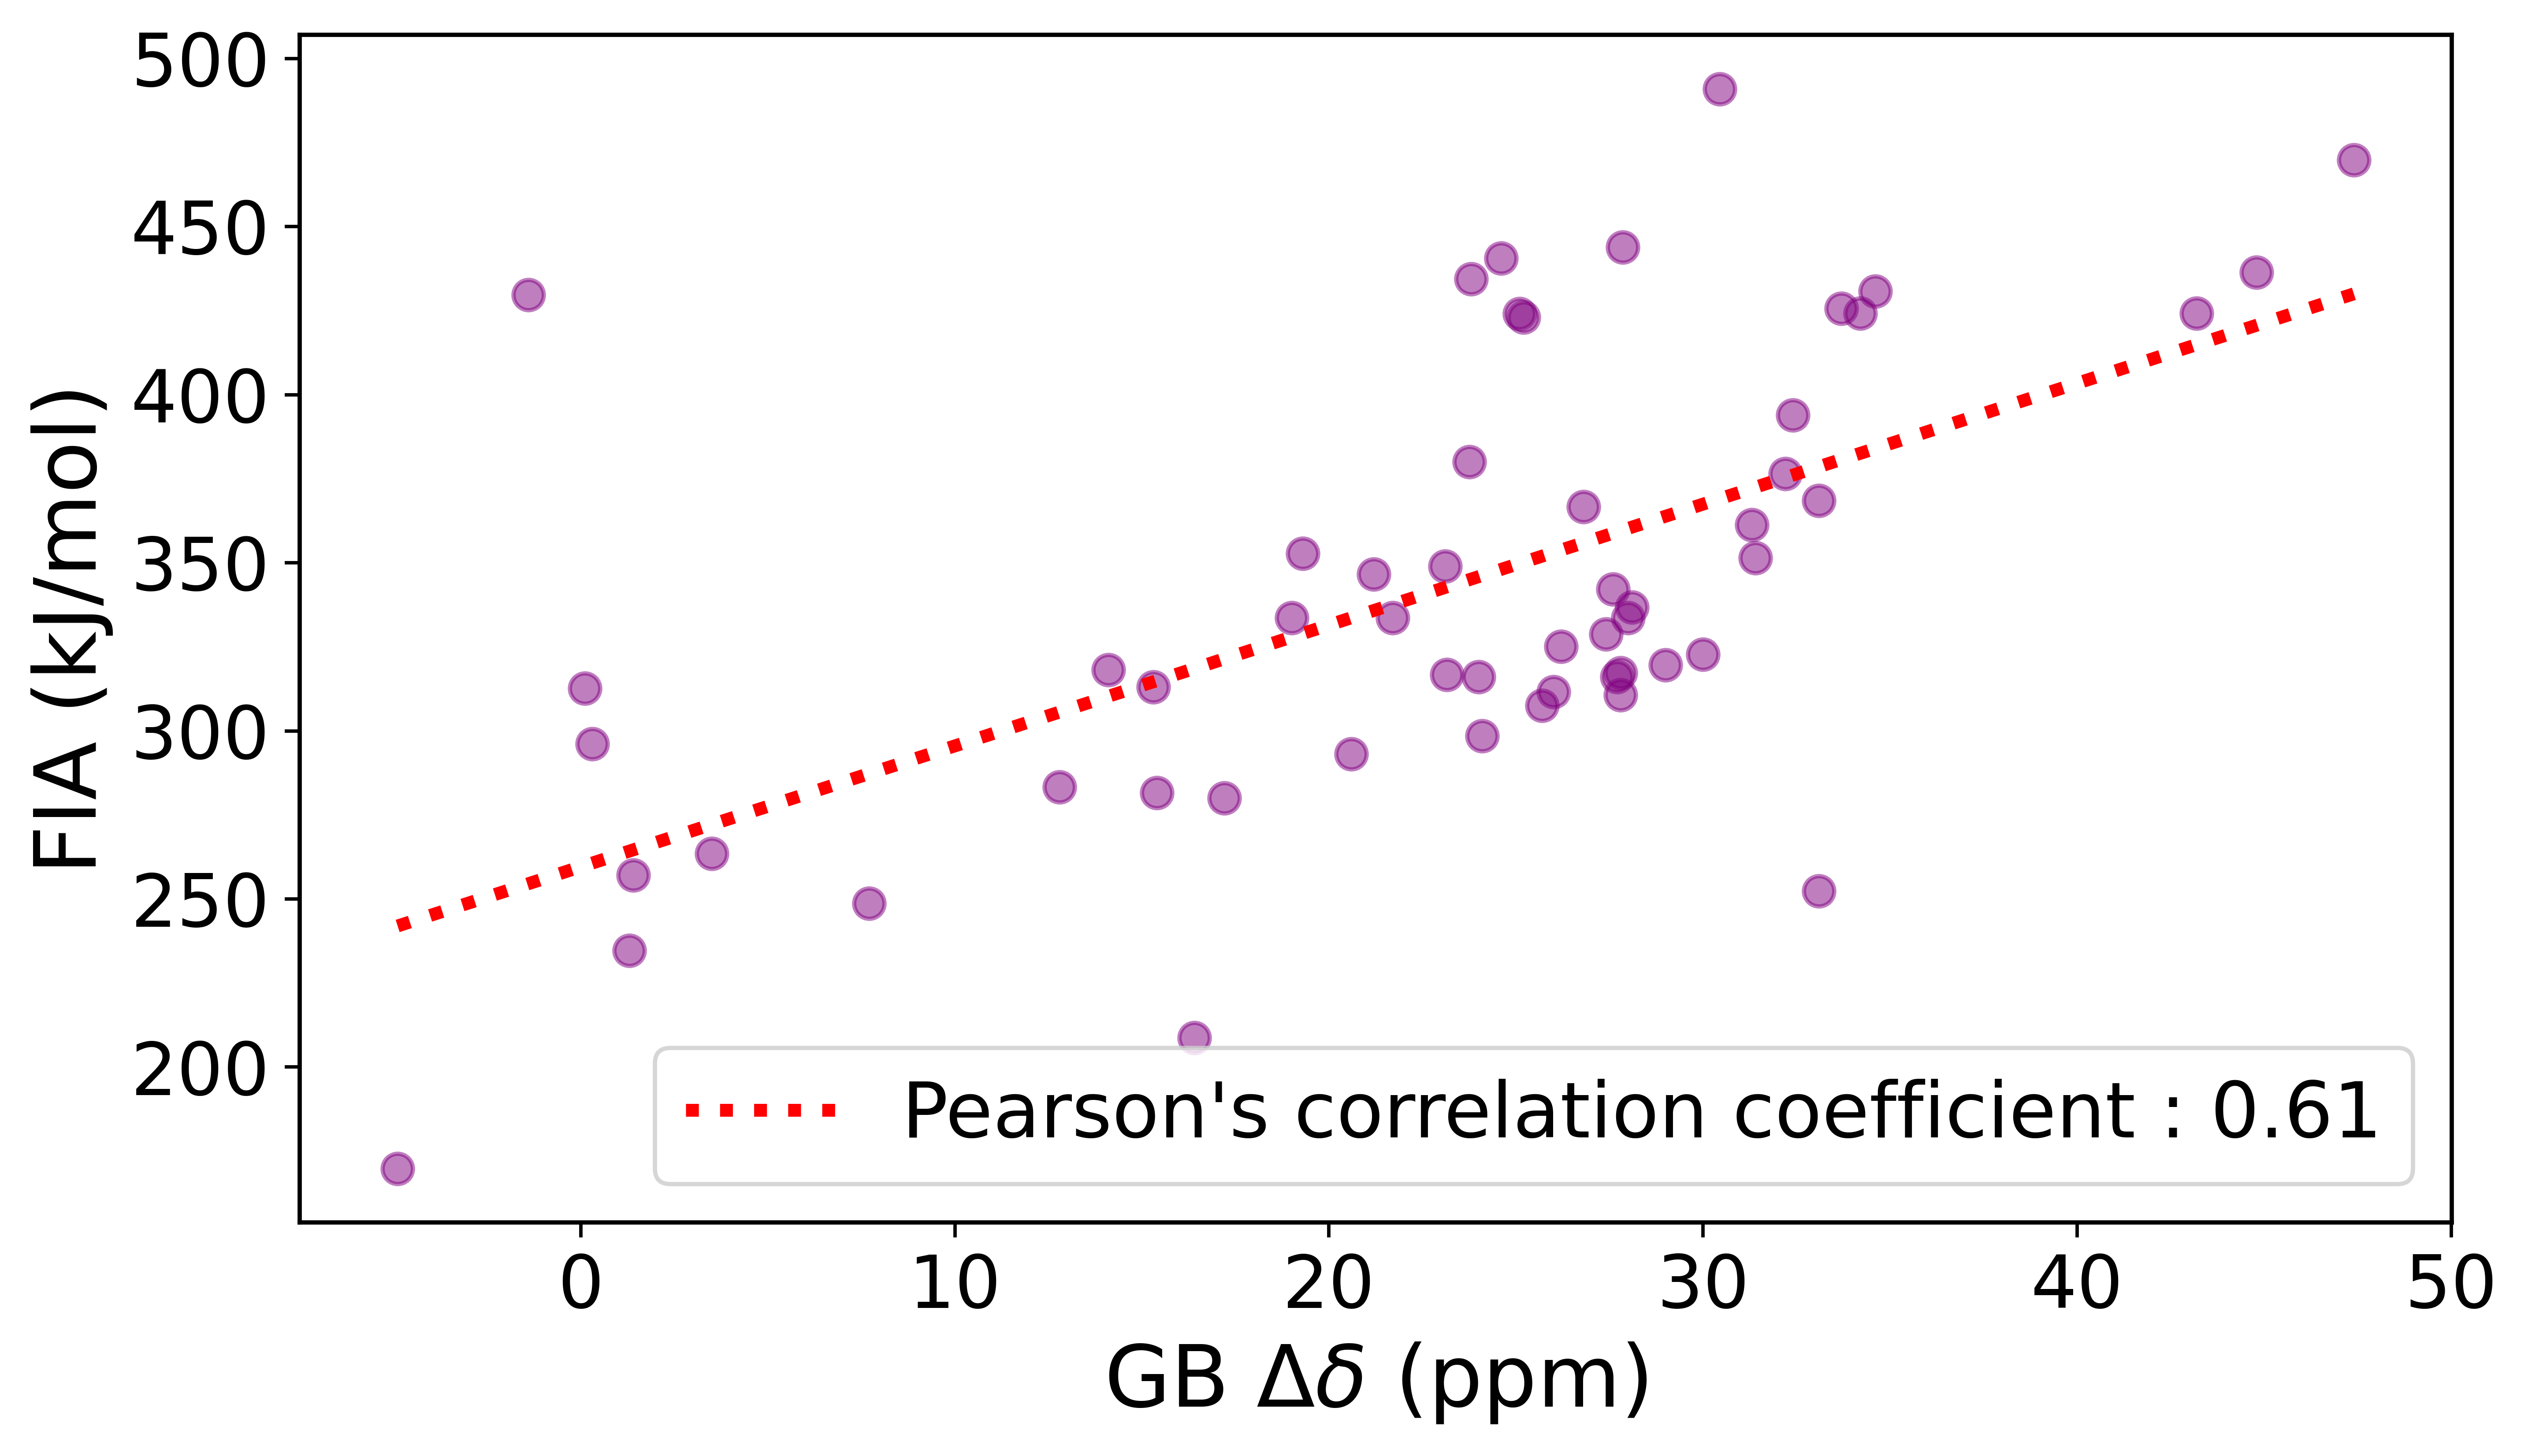

In [6]:
#params poster
rc('font', family='sans-serif', size = 20)
rc('figure', dpi= 700)
rc(('xtick', 'ytick'), labelsize = 17)
rc('legend', fontsize=18)
rc('lines', linewidth = 3)
rc('axes', linewidth = 1)
rc('legend', handlelength = 2)

fig, ax2 = plt.subplots(figsize = (9,5))


df = df_all_data.sort_values("average Ddelta")

scatter = ax2.scatter(df["average Ddelta"], df['FIA'], color = "purple", s = 50,alpha = 0.5)
ax2.set_ylabel('FIA (kJ/mol)', color='black')
ax2.set_xlabel('GB $\Delta\delta$ (ppm)')

# Calcul de la régression linéaire
slope, intercept, r_value, p_value, std_err = linregress(df["average Ddelta"], df['FIA'])

# Ajout de la ligne de régression
x_vals = np.linspace(df["average Ddelta"].min(), df["average Ddelta"].max(), 100)
y_vals = slope * x_vals + intercept
regr = ax2.plot(x_vals, y_vals, linestyle = 'dotted',color='red')

# Affichage du coefficient de corrélation de Pearson en légende
legend_text = f"Pearson's correlation coefficient : {r_value:.2f}"
ax2.legend(regr, [legend_text], loc='lower right')
#ax2.set_title("B.", fontsize = 24)

fig.savefig('figures/poster/lewis_acidity_determination.svg', format = 'svg', transparent= True, facecolor='white', bbox_inches='tight')


In [70]:
df_all_data.sort_values('FIA')

SMILES  delta (neat)  \
46                                 CN(C)B(N(C)C)N(C)C           NaN   
32                                      OB(O)c1ccccc1           NaN   
1                                           COB(OC)OC           NaN   
0                                        CCOB(OCC)OCC          48.7   
27                                                  B           NaN   
43                         CC1(C)OB(c2ccccc2F)OC1(C)C           NaN   
28                                          CCB(CC)CC           NaN   
8                                  BrCCOB(OCCBr)OCCBr          58.2   
11   CC[Si](CC)(CC)OB(O[Si](CC)(CC)CC)O[Si](CC)(CC)CC          56.4   
4                            ClCCCCOB(OCCCCCl)OCCCCCl          53.8   
9                                     ICCOB(OCCI)OCCI          61.6   
55                     Cc1cc(C)c(B2Oc3ccccc3O2)c(C)c1           NaN   
33                            c1ccc(B2Oc3ccccc3O2)cc1           NaN   
36                           Fc1ccc(B2Oc3ccccc3O2)cc1           NaN   
34                             Fc1ccccc1B1Oc2ccccc2O1           NaN   
35                           Fc1cccc(B2Oc3ccccc3O2)c1           NaN   
53             Cc1cc(C)c(B2Oc3cccc4cccc(c34)O2)c(C)c1           NaN   
3                               ClCCCOB(OCCCCl)OCCCCl          56.3   
54                          Fc1cccc(F)c1B1Oc2ccccc2O1           NaN   
38                          Fc1cccc(F)c1B1Oc2ccccc2O1           NaN   
13                      c1ccc(B(c2ccccc2)c2ccccc2)cc1           NaN   
37                        Fc1ccc(B2Oc3ccccc3O2)c(F)c1           NaN   
2                                  ClCCOB(OCCCl)OCCCl          55.1   
25                                             FB(F)F          80.9   
10                  FC(F)(F)COB(OCC(F)(F)F)OCC(F)(F)F          71.0   
40                     Fc1cc(F)c(B2Oc3ccccc3O2)c(F)c1           NaN   
51                  Fc1cccc(F)c1B1Oc2cccc3cccc(c23)O1           NaN   
52                Clc1cccc(Cl)c1B1Oc2cccc3cccc(c23)O1           NaN   
39                       Fc1cc(B2Oc3ccccc3O2)cc(F)c1F           NaN   
47                       Fc1cc(B2Oc3ccccc3O2)cc(F)c1F           NaN   
50             Fc1cc(F)c(B2Oc3cccc4cccc(c34)O2)c(F)c1           NaN   
49               Fc1cc(B2Oc3cccc4cccc(c34)O2)cc(F)c1F           NaN   
16            Fc1cccc(F)c1B(c1c(F)cccc1F)c1c(F)cccc1F           NaN   
21                   c1ccc(OB(Oc2ccccc2)Oc2ccccc2)cc1           NaN   
41                 Fc1c(F)c(F)c(B2Oc3ccccc3O2)c(F)c1F           NaN   
7                   ClCC(CCl)OB(OC(CCl)CCl)OC(CCl)CCl          60.3   
48         Fc1c(F)c(F)c(B2Oc3cccc4cccc(c34)O2)c(F)c1F           NaN   
5                      ClC(Cl)COB(OCC(Cl)Cl)OCC(Cl)Cl          67.8   
26                                  FB(F)OOOSC(F)(F)F          84.6   
6          ClC(Cl)(Cl)COB(OCC(Cl)(Cl)Cl)OCC(Cl)(Cl)Cl          73.2   
42  Fc1c(F)c(F)c(B2Cc3ccc4ccccc4c3-c3c(ccc4ccccc34...           NaN   
20  FC(F)(F)c1cc(C(F)(F)F)c(Bc2c(C(F)(F)F)cc(C(F)(...           NaN   
14  Fc1cc(F)c(F)c(B(c2c(F)c(F)cc(F)c2F)c2c(F)c(F)c...           NaN   
18  Fc1c(F)c(F)c(B(c2c(F)c(F)c(F)c(F)c2F)c2c(Cl)c(...           NaN   
29                                          ClB(Cl)Cl          88.7   
23  Fc1c(F)c(F)c(OB(Oc2c(F)c(F)c(F)c(F)c2F)c2c(F)c...           NaN   
22  Fc1c(F)c(F)c(OB(c2c(F)c(F)c(F)c(F)c2F)c2c(F)c(...           NaN   
45  Clc1c(Cl)c(Cl)c(B(c2c(Cl)c(Cl)c(Cl)c(Cl)c2Cl)c...           NaN   
24  Fc1c(F)c(F)c(OB(Oc2c(F)c(F)c(F)c(F)c2F)Oc2c(F)...           NaN   
19  Fc1c(F)c(F)c(B(c2c(Cl)c(Cl)c(Cl)c(Cl)c2Cl)c2c(...           NaN   
30                                          BrB(Br)Br          90.3   
15  Fc1cc(B(c2cc(F)c(F)c(F)c2F)c2cc(F)c(F)c(F)c2F)...           NaN   
12  Fc1c(F)c(F)c(B(c2c(F)c(F)c(F)c(F)c2F)c2c(F)c(F...           NaN   
31                                             IB(I)I          92.9   
44  Fc1c(F)c(C(F)(F)F)c(F)c(F)c1B(c1c(F)c(F)c(C(F)...           NaN   

    Ddelta (neat)  delta (CD2Cl2)  Ddelta (CD2Cl2)  \
46            Na

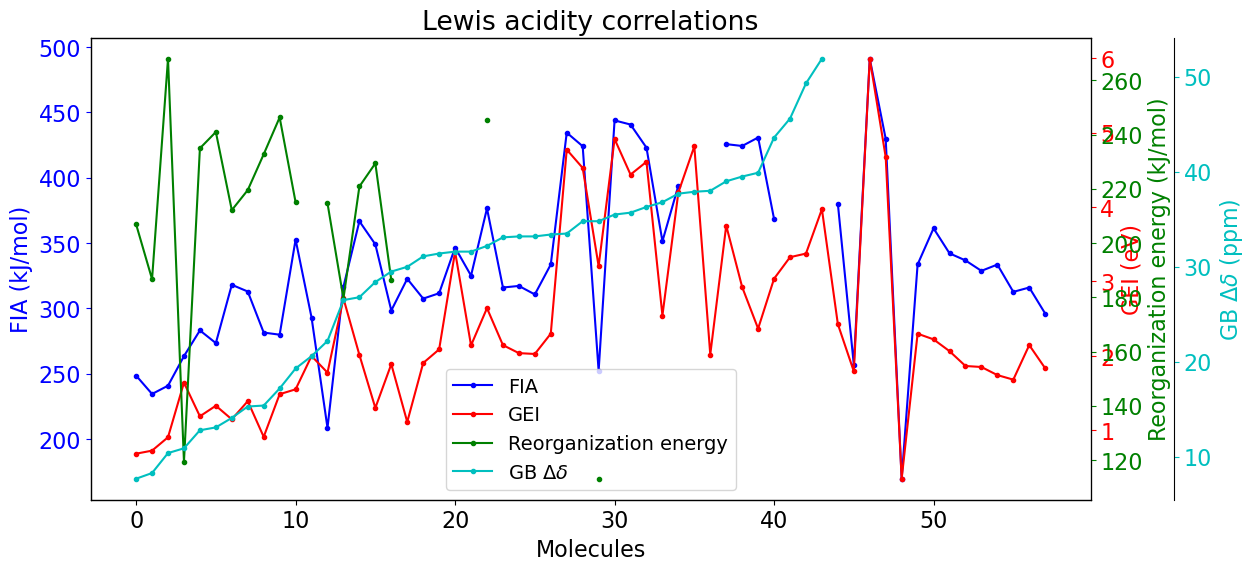

In [15]:

df = df_all_data

x = range(len(df))

y1 = df['FIA']


y2 = df['GEI']

y3 = df['reorg_nrj']

y4 = df['Ddelta']

# Création de la figure et des axes
fig = plt.figure(figsize=(16,6))
ax1 = fig.subplots()

# Tracé de la première série de données
ax1.plot(x, y1, '.b-', label='FIA')
ax1.set_xlabel('Molecules')
ax1.set_ylabel('FIA (kJ/mol)', color='b')
ax1.tick_params('y', colors='b')
#ax1.set_ylim(bottom=y1[0])

# Création d'un deuxième axe partageant le même abscisse
ax2 = ax1.twinx()

# Tracé de la deuxième série de données
ax2.plot(x, y2, '.r-', label='GEI')
ax2.set_ylabel('GEI (eV)', color='r')
ax2.tick_params('y', colors='r')
#ax2.set_ylim(bottom=y2[0])


# Superposition des deux premiers points sur le graphe
#ax1.plot(x[0], y1[0], 'bo', label = "superposition")
#ax2.plot(x[0], y2[0], 'ro')


ax3 = ax1.twinx()

# Tracé de la deuxième série de données
ax3.plot(x, y3, '.g-', label='Reorganization energy')
ax3.set_ylabel('Reorganization energy (kJ/mol)', color='g')
ax3.tick_params('y', colors='g')

ax4 = ax1.twinx()

# Tracé de la deuxième série de données
ax4.plot(x, y4, '.c-', label='GB $\Delta\delta$')
ax4.set_ylabel('GB $\Delta\delta$ (ppm)', color='c')
ax4.tick_params('y', colors='c')

ax2.spines['right'].set_position(('outward', 0))
ax4.spines['right'].set_position(('outward', 60))
#ax4.spines['right'].set_position(('outward', 180))



# Affichage de la légende
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
lines4, labels4 = ax4.get_legend_handles_labels()
ax2.legend(lines + lines2 + lines3 + lines4, labels + labels2 + labels3 + labels4, loc='lower center')

fig.subplots_adjust(right=0.75)

# Affichage du graphe
plt.title('Lewis acidity correlations')
plt.show()

#fig.savefig(f'figures/LA_description/LA_correlations.png', facecolor = 'white', 
            #format = 'png', transparent = False, bbox_inches='tight', dpi = 400)

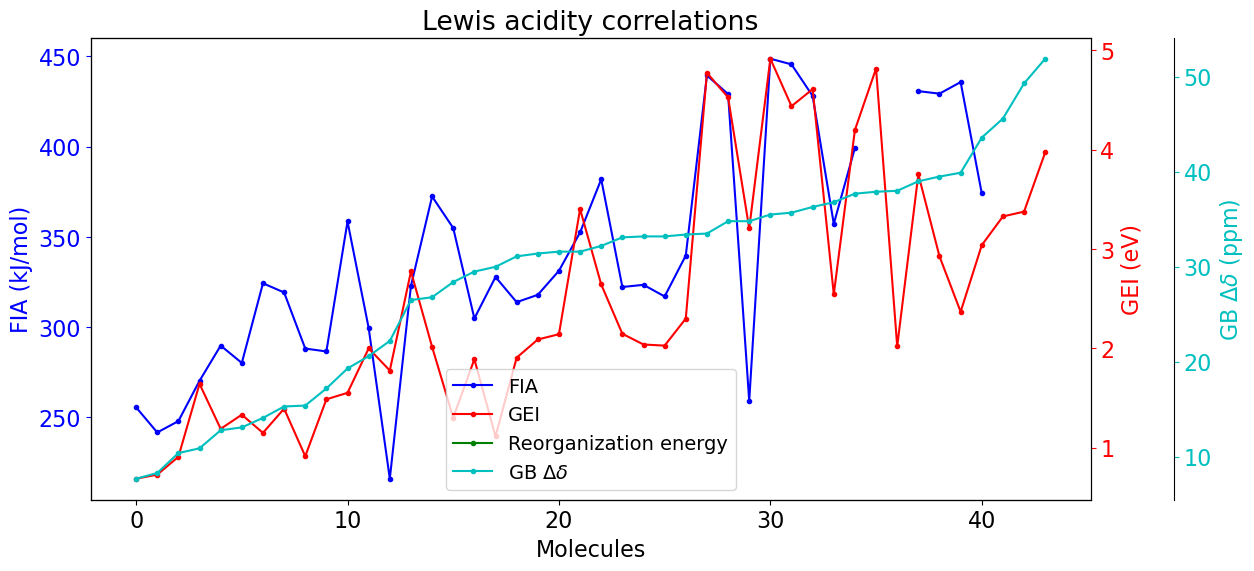

In [18]:

df = df_NMR_LA.sort_values("GB Ddelta")
x = range(len(df))

y1 = df['FIA']


y2 = df['GEI']

y3 = df['reorg_nrj']

y4 = df['GB Ddelta']

# Création de la figure et des axes
fig = plt.figure(figsize=(16,6))
ax1 = fig.subplots()

# Tracé de la première série de données
ax1.plot(x, y1, '.b-', label='FIA')
ax1.set_xlabel('Molecules')
ax1.set_ylabel('FIA (kJ/mol)', color='b')
ax1.tick_params('y', colors='b')
#ax1.set_ylim(bottom=y1[0])

# Création d'un deuxième axe partageant le même abscisse
ax2 = ax1.twinx()

# Tracé de la deuxième série de données
ax2.plot(x, y2, '.r-', label='GEI')
ax2.set_ylabel('GEI (eV)', color='r')
ax2.tick_params('y', colors='r')
#ax2.set_ylim(bottom=y2[0])


# Superposition des deux premiers points sur le graphe
#ax1.plot(x[0], y1[0], 'bo', label = "superposition")
#ax2.plot(x[0], y2[0], 'ro')


#ax3 = ax1.twinx()

# Tracé de la deuxième série de données
#ax3.plot(x, y3, '.g-', label='Reorganization energy')
#ax3.set_ylabel('Reorganization energy (kJ/mol)', color='g')
#ax3.tick_params('y', colors='g')

ax4 = ax1.twinx()

# Tracé de la deuxième série de données
ax4.plot(x, y4, '.c-', label='GB $\Delta\delta$')
ax4.set_ylabel('GB $\Delta\delta$ (ppm)', color='c')
ax4.tick_params('y', colors='c')

ax2.spines['right'].set_position(('outward', 0))
ax4.spines['right'].set_position(('outward', 60))
#ax4.spines['right'].set_position(('outward', 180))



# Affichage de la légende
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
lines4, labels4 = ax4.get_legend_handles_labels()
ax2.legend(lines + lines2 + lines3 + lines4, labels + labels2 + labels3 + labels4, loc='lower center')

fig.subplots_adjust(right=0.75)

# Affichage du graphe
plt.title('Lewis acidity correlations')
plt.show()

fig.savefig(f'figures/LA_description/LA_correlations.png', facecolor = 'white', 
            format = 'png', transparent = False, bbox_inches='tight', dpi = 400)

In [16]:
df = df_NMR_LA.sort_values("GB Ddelta")
smiles = df.index
legend = []
for d in list(df['GB Ddelta']):
    legend.append(str(d))

mols = []

for smi in smiles :
    mols.append(Chem.MolFromSmiles(smi))
img = Chem.Draw.MolsToGridImage(mols, molsPerRow=6, subImgSize=(300,300),  maxMols = 100, useSVG=True, legends = legend)
img

with open('figures/LA_description/molecules_data_GB.png', 'w') as f:
    f.write(img.data)

TypeError: No registered converter was able to produce a C++ rvalue of type std::basic_string<wchar_t, std::char_traits<wchar_t>, std::allocator<wchar_t> > from this Python object of type int

In [1]:
# Données pour la première série
df = df_NMR_LA.sort_values("GB Ddelta")
x = range(len(df))

y1 = df['FIA']




y4 = df['GB Ddelta']

# Création de la figure et des axes
fig = plt.figure(figsize=(16,6))
ax1 = fig.subplots()

# Tracé de la première série de données
ax1.plot(x, y1, '.b-', label='FIA')
ax1.set_xlabel('Molecule')
ax1.set_ylabel('FIA (kJ/mol)', color='b')
ax1.tick_params('y', colors='b')
#ax1.set_ylim(bottom=y1[0])


ax4 = ax1.twinx()

# Tracé de la deuxième série de données
ax4.plot(x, y4, '.c-', label='GB Ddelta')
ax4.set_ylabel('GB Ddelta', color='c')
ax4.tick_params('y', colors='c')


ax4.spines['right'].set_position(('outward', 180))



# Affichage de la légende
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
lines4, labels4 = ax4.get_legend_handles_labels()
ax2.legend(lines + lines2 + lines3 + lines4, labels + labels2 + labels3 + labels4, loc='lower right')

fig.subplots_adjust(right=0.75)

# Affichage du graphe
plt.title('Correlations acidité de Lewis')
plt.show()

NameError: name 'df_NMR_LA' is not defined

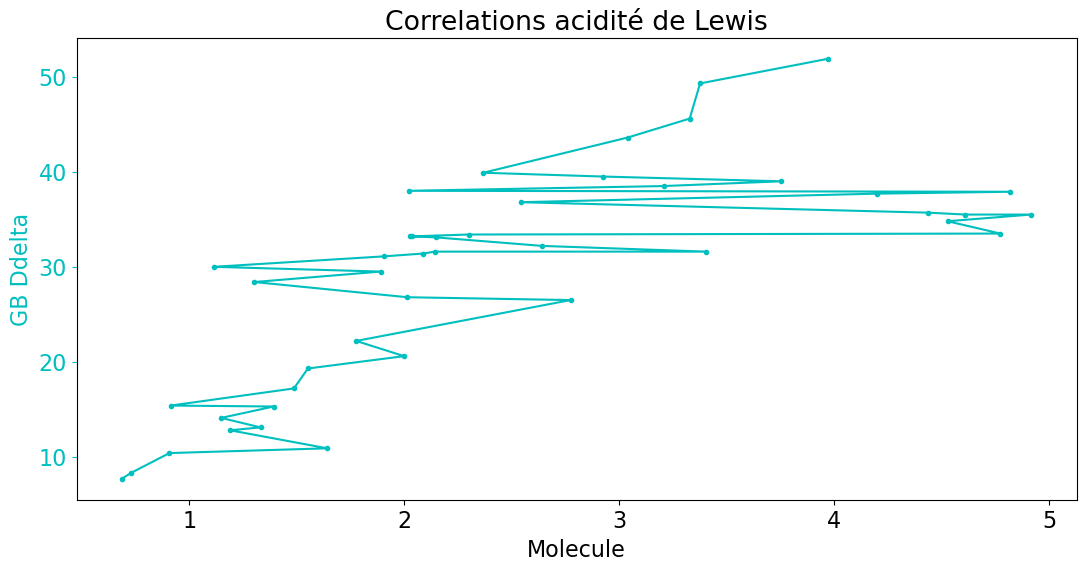

In [155]:
# Données pour la première série
df = df_NMR_LA.sort_values("GB Ddelta")
x = range(len(df))

y1 = df['GEI']




y4 = df['GB Ddelta']

# Création de la figure et des axes
fig = plt.figure(figsize=(16,6))
ax1 = fig.subplots()

# Tracé de la première série de données
#ax1.plot(x, y1, '.b-', label='FIA')
ax1.set_xlabel('Molecule')
ax1.set_ylabel('FIA (kJ/mol)', color='b')
ax1.tick_params('y', colors='b')
#ax1.set_ylim(bottom=y1[0])


#ax4 = ax1.twinx()

# Tracé de la deuxième série de données
ax1.plot(y1, y4, '.c-', label='GB Ddelta')
ax1.set_ylabel('GB Ddelta', color='c')
ax1.tick_params('y', colors='c')


ax4.spines['right'].set_position(('outward', 180))



# Affichage de la légende
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
lines4, labels4 = ax4.get_legend_handles_labels()
ax2.legend(lines + lines2 + lines3 + lines4, labels + labels2 + labels3 + labels4, loc='lower right')

fig.subplots_adjust(right=0.75)

# Affichage du graphe
plt.title('Correlations acidité de Lewis')
plt.show()

### Database small boron LA

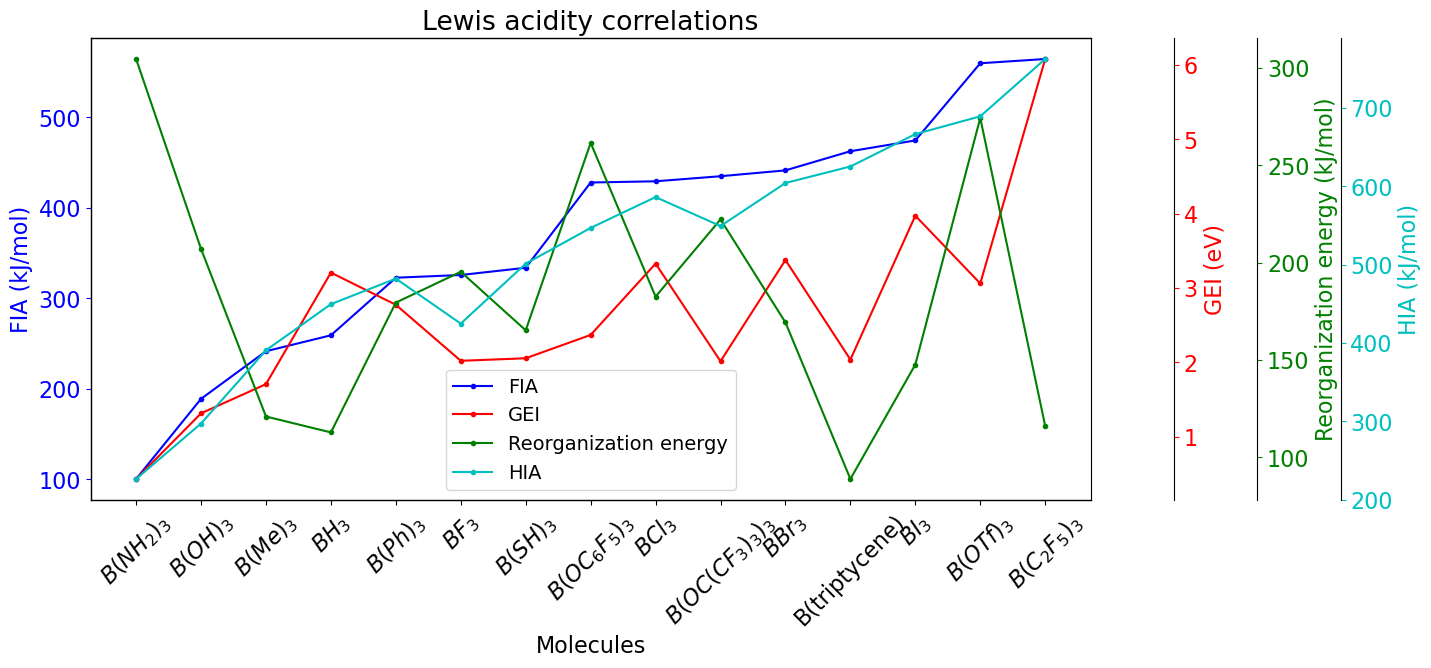

In [20]:

df = df_small_LA.sort_values("FIA")
x = range(len(df))

y1 = df['FIA']


y2 = df['GEI']

y3 = df['reorg nrj']

y4 = df['HIA']

# Création de la figure et des axes
fig = plt.figure(figsize=(16,6))
ax1 = fig.subplots()

# Tracé de la première série de données
ax1.plot(x, y1, '.b-', label='FIA')
ax1.set_xlabel('Molecules')
ax1.set_ylabel('FIA (kJ/mol)', color='b')
ax1.tick_params('y', colors='b')
#ax1.set_ylim(bottom=y1[0])

# Création d'un deuxième axe partageant le même abscisse
ax2 = ax1.twinx()

# Tracé de la deuxième série de données
ax2.plot(x, y2, '.r-', label='GEI')
ax2.set_ylabel('GEI (eV)', color='r')
ax2.tick_params('y', colors='r')
#ax2.set_ylim(bottom=y2[0])


# Superposition des deux premiers points sur le graphe
#ax1.plot(x[0], y1[0], 'bo', label = "superposition")
#ax2.plot(x[0], y2[0], 'ro')


ax3 = ax1.twinx()

# Tracé de la deuxième série de données
ax3.plot(x, y3, '.g-', label='Reorganization energy')
ax3.set_ylabel('Reorganization energy (kJ/mol)', color='g')
ax3.tick_params('y', colors='g')

ax4 = ax1.twinx()

# Tracé de la deuxième série de données
ax4.plot(x, y4, '.c-', label='HIA')
ax4.set_ylabel('HIA (kJ/mol)', color='c')
ax4.tick_params('y', colors='c')

ax2.spines['right'].set_position(('outward', 60))
ax3.spines['right'].set_position(('outward', 120))
ax4.spines['right'].set_position(('outward', 180))



# Affichage de la légende
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
lines4, labels4 = ax4.get_legend_handles_labels()
ax2.legend(lines + lines2 + lines3 + lines4, labels + labels2 + labels3 + labels4, loc='lower center')

names = df['names']
num = list(range(len(names)))
ax1.set_xticks(num)
ax1.set_xticklabels(names, rotation = 45)

fig.subplots_adjust(right=0.75)

# Affichage du graphe
plt.title('Lewis acidity correlations')
plt.show()

fig.savefig(f'figures/LA_description/LA_correlations_small_LA.png', facecolor = 'white', 
            format = 'png', transparent = False, bbox_inches='tight', dpi = 400)

In [4]:
df = df_NMR_LA.sort_values("GB Ddelta")

smiles = df.index
delta = df["GB Ddelta"]

mols = [Chem.MolFromSmiles(smi) for smi in smiles] #crée une liste de molécules

legends = [str(d) for d in delta]
img = Chem.Draw.MolsToGridImage(mols, molsPerRow=6, subImgSize=(200,200),  maxMols = 100, useSVG=True, legends = legends)


with open('figures/molecules_data_GB.png', 'w') as f:
    f.write(img.data)

NameError: name 'df_NMR_LA' is not defined

In [5]:
df_small_LA

SMILES         FIA         HIA  \
0                                                   B  259.170256  449.508855   
1                                           BrB(Br)Br  441.417984  604.074891   
2         C12=C(B(C3=CC=CC=C3C24)C5=C4C=CC=C5)C=CC=C1  462.571636  625.121654   
3                                              CB(C)C  241.568584  390.676537   
4                                           ClB(Cl)Cl  429.359626  586.126987   
5                                              FB(F)F  325.801314  424.750101   
6    FC(F)(F)C(F)(F)B(C(F)(F)C(F)(F)F)C(F)(F)C(F)(F)F  564.489374  762.254887   
7   FC(F)(F)C(OB(OC(C(F)(F)F)(C(F)(F)F)C(F)(F)F)OC...  434.959740  549.137255   
8   Fc3c(F)c(F)c(OB(Oc1c(F)c(F)c(F)c(F)c1F)Oc2c(F)...  428.021276  546.780979   
9                                              IB(I)I  474.495430  666.414760   
10                                             NB(N)N  100.371627  226.488458   
11  O=S(=O)(OB(OS(=O)(=O)C(F)(F)F)OS(=O)(=O)C(F)(F...  559.779162  689.119175   
12                                             OB(O)O  188.961182  297.281212   
13                                             SB(S)S  333.796418  501.180125   
14                      c3ccc(B(c1ccccc1)c2ccccc2)cc3  322.816135  482.083421   

     reorg nrj       GEI              names  
0   112.790268  3.205747             $BH_3$  
1   169.261196  3.375112            $BBr_3$  
2    88.860382  2.035476      B(triptycene)  
3   120.958185  1.705263          $B(Me)_3$  
4   182.543686  3.326776            $BCl_3$  
5   195.269633  2.019028             $BF_3$  
6   116.096864  6.080053      $B(C_2F_5)_3$  
7   222.172132  2.012874  $B(OC(CF_3)_3)_3$  
8   261.470534  2.367039     $B(OC_6F_5)_3$  
9   147.642616  3.971528             $BI_3$  
10  304.558493  0.428527        $B(NH_2)_3$  
11  274.281436  3.059650         $B(OTf)_3$  
12  207.035699  1.311895          $B(OH)_3$  
13  165.224540  2.053139          $B(SH)_3$  
14  179.464046  2.772945          $B(Ph)_3$

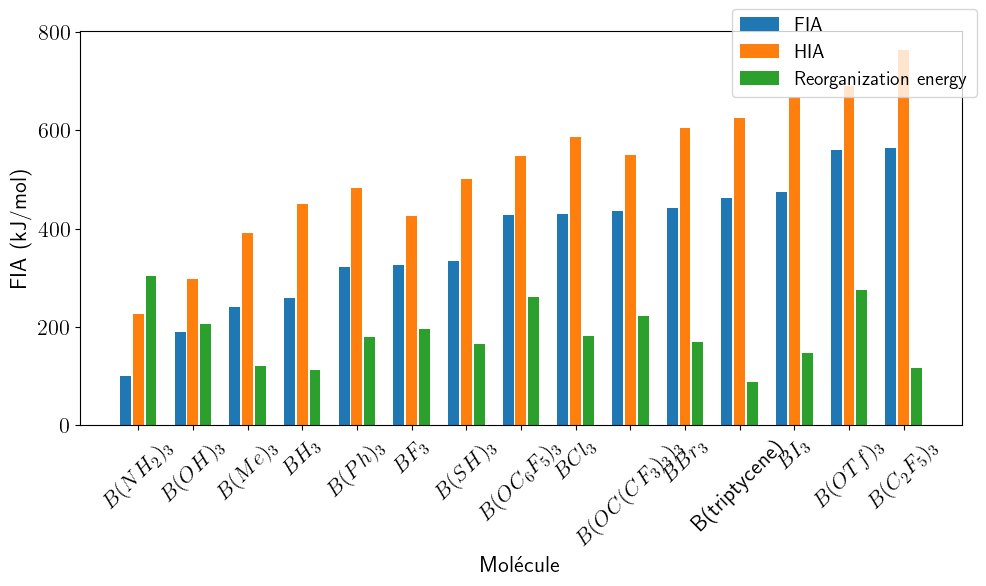

In [12]:
df = df_small_LA.sort_values("FIA")

FIA = df.FIA
HIA = df.HIA
reorg_nrj = df['reorg nrj']
names = df.names


fig = plt.figure(figsize = (10,6))
ax =  fig.subplots()

num = list(range(len(names)))


width = 0.7/3

axis = lambda x : x - width * (1 - n)
n=0
ax.bar(list(map(axis, num)), FIA, label = "FIA", width = 0.2)
n=1
ax.bar(list(map(axis, num)), HIA, label = "HIA", width = 0.2)
n = 2 
ax.bar(list(map(axis, num)), reorg_nrj, label = "Reorganization energy", width = 0.2)
    
ax.set_xticks(num)
ax.set_xticklabels(names, rotation = 45)

ax.set_xlabel('Molécule')
ax.set_ylabel('FIA (kJ/mol)')

fig.legend()
fig.tight_layout()

#fig.savefig('data_fia_methods.svg',facecolor = 'white', transparent = False, format = 'svg')
fig.savefig('figures/LA_description/data_FIA_HIA_reorg.png',facecolor = 'white', transparent = False, format = 'png')